In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
df = pd.DataFrame({'Nome': ['Edu', 'Ana', 'Bob', 'Jon', 'Lia'],
'Idade': [25, 30, 35, 40, 45],
'Peso': [70, 65, 80, 75, 85]})
df

,Nome,Idade,Peso
0,Edu,25,70
1,Ana,30,65
2,Bob,35,80
3,Jon,40,75
4,Lia,45,85


In [4]:
df.loc[[0,2,4]]

,Nome,Idade,Peso
0,Edu,25,70
2,Bob,35,80
4,Lia,45,85


In [5]:
print(df.loc[1:2, ['Nome', 'Peso']])


  Nome  Peso
1  Ana    65
2  Bob    80


In [6]:
df = pd.DataFrame({'estado': ['SP', 'SP', 'RJ', 'RJ', 'MG'],
                    'cidade': ['Cascavel', 'Bonito', 'Bom Jesus', 'Planalto', 'Bonito'],
                    'população': [10000, 20000, 15000, 25000, 30000]})
df.set_index(['estado', 'cidade'], inplace=True)

#mostar todas as cidades com nome Bonito
print(df.xs('Bonito', level='cidade'))

        população
estado           
SP          20000
MG          30000


In [7]:
df = pd.read_csv('SpotifyFeatures.csv')
df.energy.quantile(.9)

np.float64(0.901)

In [8]:
# Qual é a música mais popular de cada gênero?
df.groupby('genre')['popularity'].idxmax()

genre
A Capella              552
Alternative            671
Anime                27732
Blues                45632
Children's Music     71689
Children’s Music     77053
Classical           104023
Comedy              167315
Country             212275
Dance                 9027
Electronic           22169
Folk                 40496
Hip-Hop              66643
Indie                92824
Jazz                145430
Movie               181735
Opera                57584
Pop                 107804
R&B                 152266
Rap                  86951
Reggae              122398
Reggaeton           138918
Rock                166057
Ska                 156521
Soul                191939
Soundtrack          197504
World               207149
Name: popularity, dtype: int64

<Axes: title={'center': 'popularity'}, xlabel='genre'>

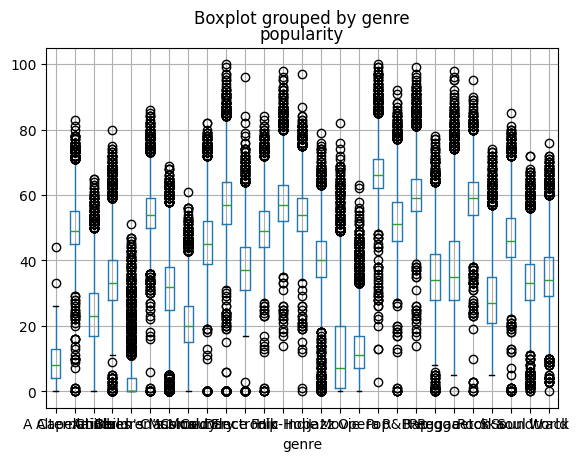

In [13]:
df.boxplot(column='popularity', by='genre')

In [9]:
%%timeit -n 10
# import matplotlib.pyplot as plt
# _, ax = plt.subplots()
data = df.groupby('genre')['duration_ms'].list()
# data
# ax.boxplot(data.values, labels=data.index)0
# plt.xticks(rotation=90)
# plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'list'

In [ ]:
df.boxplot(column='duration_ms', by='genre', rot=90, ax=ax)

<Axes: title={'center': 'duration_ms'}, xlabel='genre'>

In [ ]:
# qual o nome da música mais popular de cada gênero?
print(df.loc[df.groupby('genre')['popularity'].idxmax()][['genre', 'track_name']])

                   genre                                      track_name
552            A Capella                            For the Longest Time
671          Alternative                                       Sanctuary
27732              Anime                                         Unravel
45632              Blues                              Sweet Home Alabama
71689   Children's Music                          Lullaby and Good Night
77053   Children’s Music    11 Minutes (with Halsey feat. Travis Barker)
104023         Classical                                Olancha Farewell
167315            Comedy                                        Kickapoo
212275           Country                                 Beautiful Crazy
9027               Dance                                         7 rings
22169         Electronic  Taki Taki (with Selena Gomez, Ozuna & Cardi B)
40496               Folk                                   Power Over Me
66643            Hip-Hop                           

In [15]:
df = pd.DataFrame({'data': ['27 de Janeiro de 2021', '28 de Fevereiro de 2021', '31 de Março de 2021']})
# use portuguese month names
df.data = df.data.str\
    .replace('Janeiro', 'January')\
        .str.replace('Fevereiro', 'February')\
            .str.replace('Março', 'March')\
            .str.replace('de ', '')
df.data = pd.to_datetime(df.data, format='%d %B %Y')
df

,data
0,2021-01-27
1,2021-02-28
2,2021-03-31


In [25]:
df = pd.DataFrame({'data': pd.date_range('2021-01-01', periods=3, freq='M'),
                     'valor': [100, 200, 300]})
df.set_index('data', inplace=True)
df.resample('D').interpolate()

,valor
data,
2021-01-31,100.000000
2021-02-01,103.571429
2021-02-02,107.142857
2021-02-03,110.714286
2021-02-04,114.285714
2021-02-05,117.857143
2021-02-06,121.428571
2021-02-07,125.000000
2021-02-08,128.571429


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('GlobalTemperatures.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [4]:
df.dt.duplicated().sum()

0

In [1]:
import pandas as pd

df = pd.read_csv('boi_gordo.csv')
# print(df.info())
df.Data = pd.to_datetime(df.Data, format='%d.%m.%Y')
df.drop_duplicates(subset='Data', inplace=True) # remove duplicatas


In [16]:
df.groupby(df.Data.dt.year).mean().sort_values('Preço', ascending=False)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2010-08-02 00:00:00,"92,17","92,78","93,00","91,75","8,36K","-0,52%"
2010-08-02 01:00:00,0,0,0,0,0,0
2010-08-02 02:00:00,0,0,0,0,0,0
2010-08-02 03:00:00,0,0,0,0,0,0
2010-08-02 04:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2023-07-30 20:00:00,0,0,0,0,0,0
2023-07-30 21:00:00,0,0,0,0,0,0
2023-07-30 22:00:00,0,0,0,0,0,0
